In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, KFold, cross_val_predict, validation_curve,GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse,r2_score as r2,mean_absolute_error as mae, confusion_matrix
from sklearn.preprocessing import StandardScaler, minmax_scale
from sklearn.preprocessing import OneHotEncoder, LabelEncoder 
import statsmodels.formula.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
import time
import sklearn.metrics as eva

In [2]:
social = pd.read_csv('Social_Network_Ads.csv', delimiter = ';')

In [3]:
social.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
social.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [5]:
diff = 257 - 143 
diff

114

In [6]:
social = social.append(social[social['Purchased'] == 1].sample(n=diff,replace=True))

In [7]:
social = social.drop('User ID', axis= 1)

In [8]:
social.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [9]:
LE = LabelEncoder()
social['Gender'] = LE.fit_transform(social['Gender'])

In [10]:
social['Age'] = minmax_scale(social[['Age']])
social['EstimatedSalary'] = minmax_scale(social[['EstimatedSalary']])


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64.
  


In [11]:
X = social.iloc[:, :-1]
Y = social.iloc[:, -1]
X.head() , Y.head()

(   Gender       Age  EstimatedSalary
 0       1  0.023810         0.029630
 1       1  0.404762         0.037037
 2       0  0.190476         0.207407
 3       0  0.214286         0.311111
 4       1  0.023810         0.451852, 0    0
 1    0
 2    0
 3    0
 4    0
 Name: Purchased, dtype: int64)

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.20)

# KNN

In [13]:
grid_params = {'n_neighbors' : list(range(1, 11)),
                'weights' : ['uniform', 'distance'], 
                 'metric' : ['euclidean'],
                  'p' : [1, 2, 3],
                'algorithm': ['ball_tree', 'kd_tree']
              }

In [14]:
GS = GridSearchCV(KNeighborsClassifier(), grid_params, cv=10, verbose = 1, scoring='accuracy', return_train_score=True)


In [15]:
start = time.time()

GD_result = GS.fit(xtrain, ytrain)
end = time.time()
time_diff = end - start
print(time_diff)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


6.195354461669922


[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    6.1s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


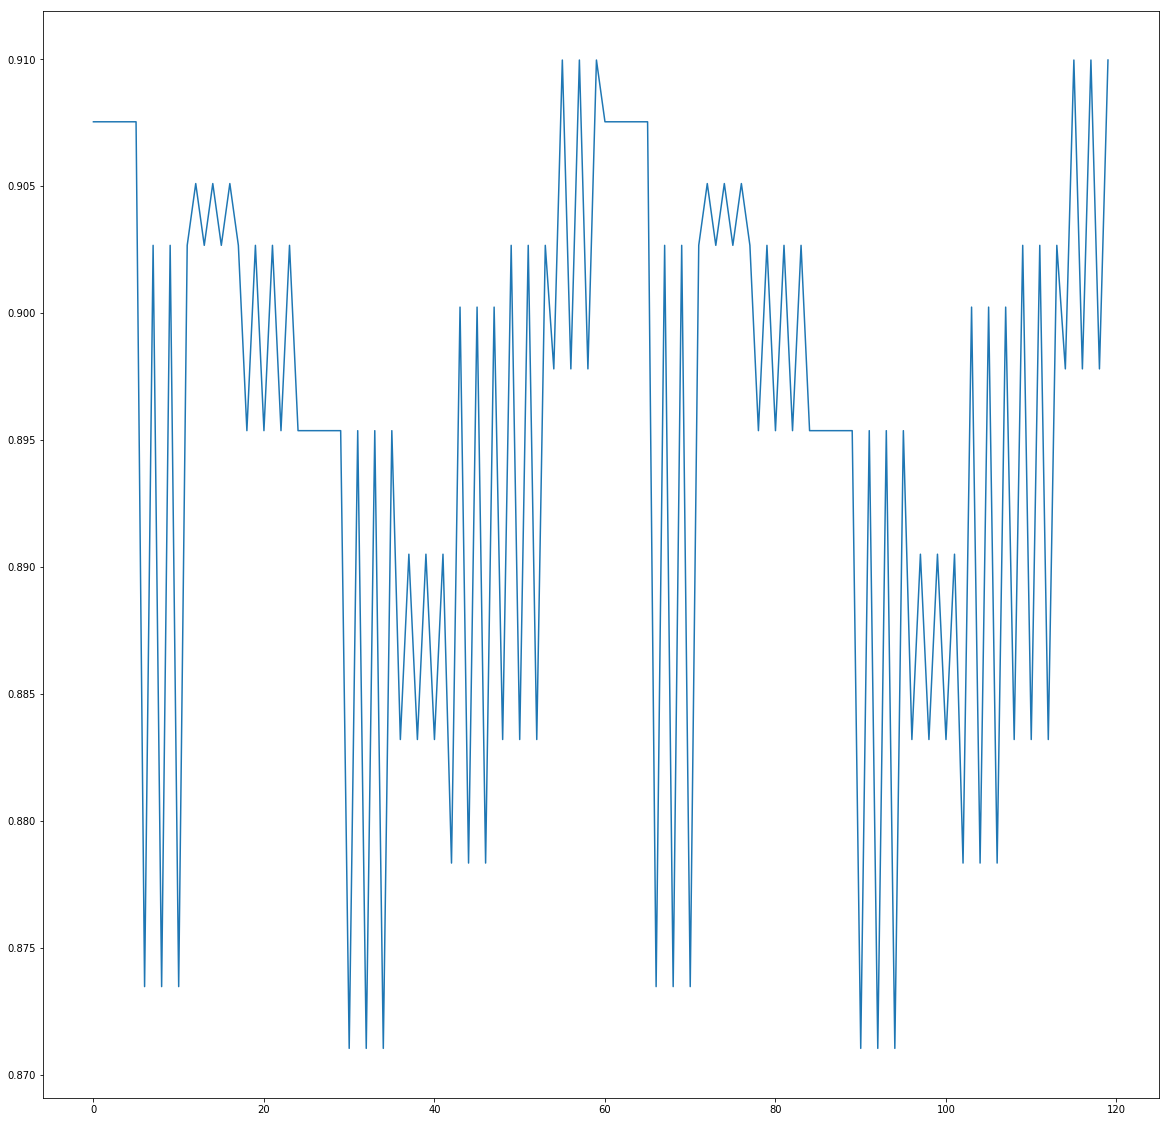

In [16]:
mean_test_score = GD_result.cv_results_['mean_test_score']
plt.figure(figsize=(20, 20))
plt.plot(mean_test_score)

In [17]:
GS.predict(xtest)

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1], dtype=int64)

In [39]:
GS.predict_proba(xtest)[:5]

array([[0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.11823918, 0.88176082],
       [1.        , 0.        ]])

In [18]:
accuracy_score(ytest, GS.predict(xtest))

0.9611650485436893

In [19]:
confusion_matrix(ytest, GS.predict(xtest))

array([[59,  3],
       [ 1, 40]], dtype=int64)

In [34]:
eva.precision_score(ytest, LR.predict(xtest))

0.8222222222222222

In [35]:
eva.recall_score(ytest, LR.predict(xtest))

0.9024390243902439

In [36]:
f1_score(ytest, LR.predict(xtest))

0.8604651162790697

In [20]:
GD_result.best_score_, GD_result.best_estimator_, GD_result.best_params_

(0.9099756690997567,
 KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='euclidean',
            metric_params=None, n_jobs=None, n_neighbors=10, p=1,
            weights='distance'),
 {'algorithm': 'ball_tree',
  'metric': 'euclidean',
  'n_neighbors': 10,
  'p': 1,
  'weights': 'distance'})

In [21]:
pd.DataFrame(GD_result.cv_results_)[['mean_test_score', 'std_test_score', 'params']].head()

,mean_test_score,std_test_score,params
0,0.907543,0.039512,"{'algorithm': 'ball_tree', 'metric': 'euclidea..."
1,0.907543,0.039512,"{'algorithm': 'ball_tree', 'metric': 'euclidea..."
2,0.907543,0.039512,"{'algorithm': 'ball_tree', 'metric': 'euclidea..."
3,0.907543,0.039512,"{'algorithm': 'ball_tree', 'metric': 'euclidea..."
4,0.907543,0.039512,"{'algorithm': 'ball_tree', 'metric': 'euclidea..."


In [22]:
mean_test_score = GD_result.cv_results_['mean_test_score']

In [23]:
mean_train_score = GD_result.cv_results_['mean_train_score']

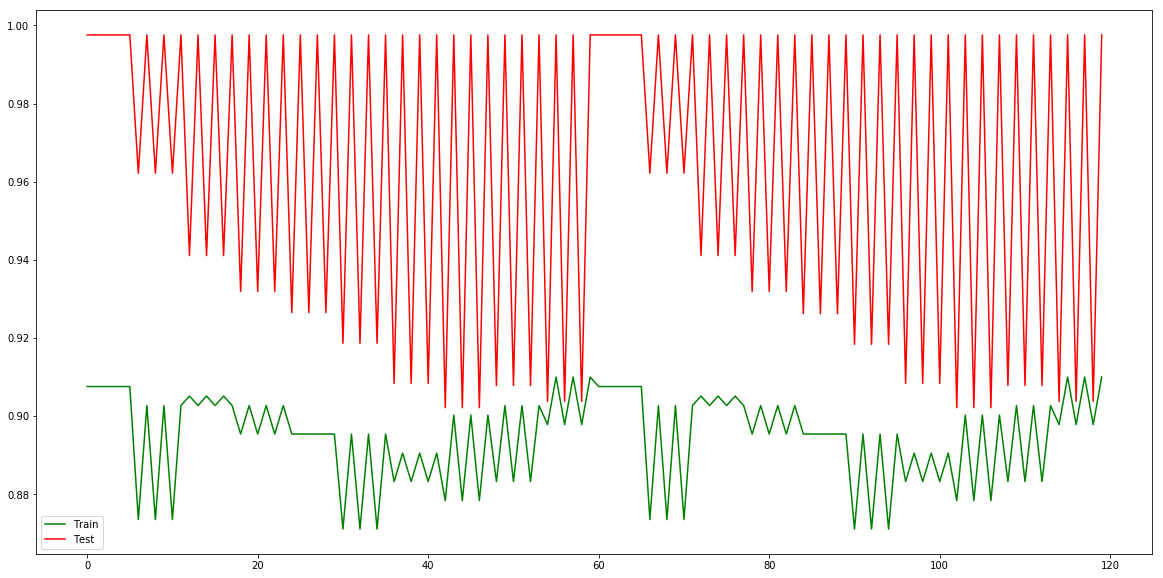

In [24]:
plt.figure(figsize=(20, 10))
plt.plot(mean_test_score, color = 'green')
plt.plot(mean_train_score, color = 'red')
plt.legend(['Train', 'Test'])

In [25]:
diff = mean_test_score - mean_train_score

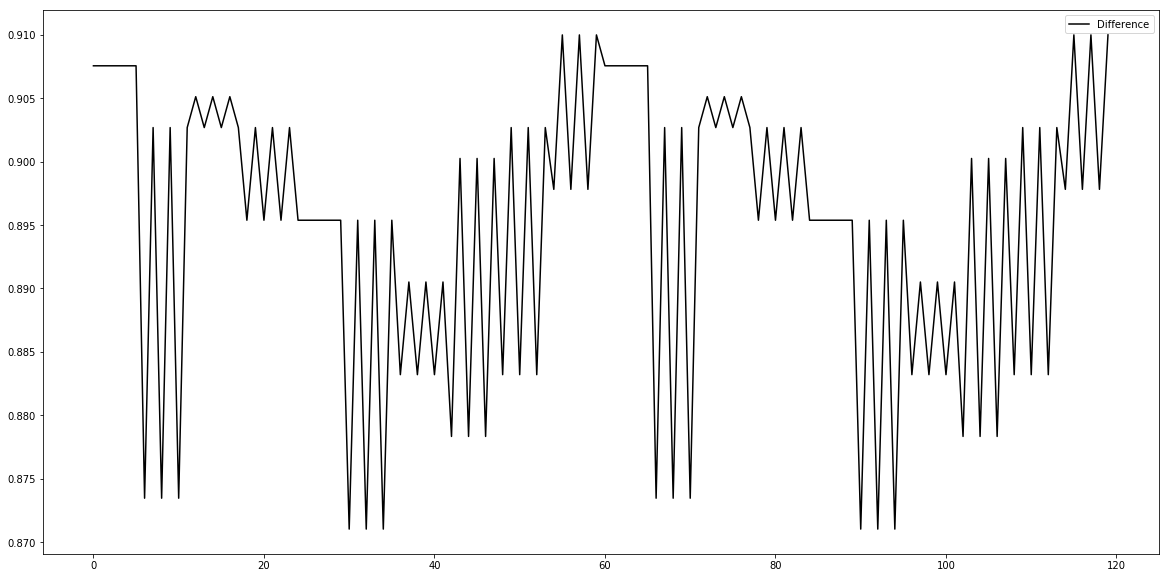

In [26]:
plt.figure(figsize=(20, 10))
plt.plot(mean_test_score, color = 'black')
plt.legend(['Difference'])

# Logistioc

In [27]:
LR = LogisticRegression()
LR.fit(xtrain, ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [28]:
score = accuracy_score(ytrain, LR.predict(xtrain))
score

0.8369829683698297

In [29]:
score = accuracy_score(ytest, LR.predict(xtest))
score

0.883495145631068

In [30]:
confusion_matrix(ytest, LR.predict(xtest))

array([[54,  8],
       [ 4, 37]], dtype=int64)

In [31]:
eva.precision_score(ytest, LR.predict(xtest))

0.8222222222222222

In [32]:
eva.recall_score(ytest, LR.predict(xtest))

0.9024390243902439

In [33]:
f1_score(ytest, LR.predict(xtest))

0.8604651162790697

In [111]:
y_pred  =GS.predict_proba(xtest)
y_pred[:, 1]

array([1.        , 0.        , 0.        , 0.88176082, 0.        ,
       0.        , 1.        , 0.        , 0.91124038, 1.        ,
       0.        , 0.13007915, 1.        , 0.91277374, 0.        ,
       0.04926907, 0.74345523, 0.07436919, 0.        , 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       0.        , 1.        , 1.        , 0.16526506, 1.        ,
       0.93456445, 0.        , 0.        , 0.        , 0.88836184,
       0.        , 0.04926907, 0.        , 0.9104898 , 0.        ,
       0.        , 0.        , 1.        , 1.        , 0.        ,
       0.94236615, 1.        , 0.76199936, 0.76199936, 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.33428749, 0.        , 0.        , 1.        ,
       0.03068853, 0.        , 0.17475756, 0.        , 1.        ,
       0.        , 1.        , 0.        , 0.        , 0.68288

In [58]:
accuracy_score(ytest, way)

0.970873786407767

In [110]:
way1 = y_pred[:, 1]
way = pd.DataFrame(way1)
#way

In [112]:
pd.DataFrame(y_pred[:, 1])

,0
0,1.000000
1,0.000000
2,0.000000
3,0.881761
4,0.000000
5,0.000000
6,1.000000
7,0.000000
8,0.911240
9,1.000000


In [113]:
acc = []
f1 = []
for i in [.1, .2, .3, .4, .5, .6, .7, .8, .9]:
    y_pred  =GS.predict_proba(xtest)
    way = pd.DataFrame(y_pred[:, 1])
    way[way[:] > i] = 1
    way[way[:] < i] = 0
    acc.append(accuracy_score(ytest, way))
    f1.append(f1_score(ytest, way))

In [114]:
acc

[0.8932038834951457,
 0.9320388349514563,
 0.941747572815534,
 0.9611650485436893,
 0.9611650485436893,
 0.9611650485436893,
 0.970873786407767,
 0.941747572815534,
 0.941747572815534]

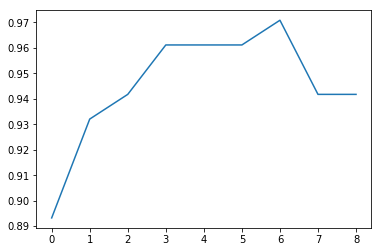

In [115]:
plt.plot(acc)